### Лабораторная работа №3
<br>
Выполнила: Галиуллина Алина Ринатовна
<br>
Направление: аналитика данных, группа S4101
<br>
Тема работы: классификация
<br>
Основные комментарии по существу задачи будут в ячейках "Markdown". Примечания по коду будут закомментированы в ячейках самого кода

<b>Выполнено: все пункты задания.</b>

<b> Задачи: 
1) Взять данные для предсказания заболеваний сердца (целевой признак для предсказания --- target).
    
    
2) Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
    
    
3) Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
    
    
4) При необходимости выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
    
    
5) Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
    
6) Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
    
    
7) Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
    
    
8) (+2 балла) Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров и добавить его в сравнение.
    
    
9) (+3 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

import os

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from scipy import stats


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline, Pipeline

from scipy.spatial import distance
from statistics import mode

import scipy.stats as stats

### Задача 1

 <b> Heart Disease Dataset </b>

In [2]:
# Считаем данные и выведем датафрейм
df = pd.read_csv('heart.csv')

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


### ШАГ 0. Знакомство с данными и их осмысление. Постановка задачи.
<br>
В данных нет пропусков, что упрощает нам работу.

Имеем данные о 1025-ти пациентах. Полный перечень атрибутов будет приведен ниже.
<br>

<b>Задача </b>: на основании показателей здоровья предсказывать диагноз пациента (есть заболевание сердца или нет)

<b>Описание переменных</b>

age : возраст


sex : пол (1 = мужчина, 0 = женщина)


cp : тип боли в груди


trestbps : артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)


холестерин : уровень холестерина в сыворотке крови в мг/дл


fbs : (уровень сахара в крови натощак > 120 мг/дл) (1 = истина; 0 = ложь)


restecg : результаты электрокардиографии в состоянии покоя


thalach : достигнутая максимальная частота сердечных сокращений


exang : стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)


oldpeak : депрессия ST, вызванная физической нагрузкой, относительно покоя


slope : наклон пикового сегмента ST при физической нагрузке


ca : количество крупных сосудов (0-3), окрашенных флуороскопией


thal : 3 = норма; 6 = исправленный дефект; 7 = обратимый дефект


target : есть заболевание или нет (1=да, 0=нет)

In [3]:
df.shape

(1025, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Предварительные наблюдения: средний возраст людей около 54 лет, обследовались преимущественно мужчины. Пока что остальные характеристики неясны.

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


В данных нет пропусков.

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### ШАГ 1. Предобработка данных. Разведочный анализ.
<br>
На данном шаге исследуем взаимосвязь предикторов, распределения признаков.

Построим гистограммы распределений каждого признака.

In [7]:
'''
    Функция hist_count_plot для построения гистограмм распределения признаков
    df: датасет pandas.DataFrame, набор данных
    nrows: число int, количество строк в сетке графиков
    ncols: число int, количество столбцов в сетке графиков
    show_kde: булевое значение boolean, требуется ли отображение ядерной оценки плотности
    show_class: булевое значение boolean, требуется ли отображение count plot'а для графиков, где 
    количество значений признака не превышает 4
'''
def hist_count_plot(df, nrows, ncols, show_kde = False, show_class = False):
    figure = plt.figure(figsize = (20, 20))
    grid = plt.GridSpec(nrows, ncols)
    for ind, col_name in enumerate(df.columns):
        plt.subplot(grid[ind])
        if show_class == True:
            if len(df.iloc[:, ind].value_counts()) > 4:
                sns.histplot(data = df, x = col_name, kde = show_kde, hue = 'target')
            else:
                sns.countplot(col_name, hue='target', data=df)
        else:
            sns.histplot(df.iloc[:, ind], kde = show_kde)

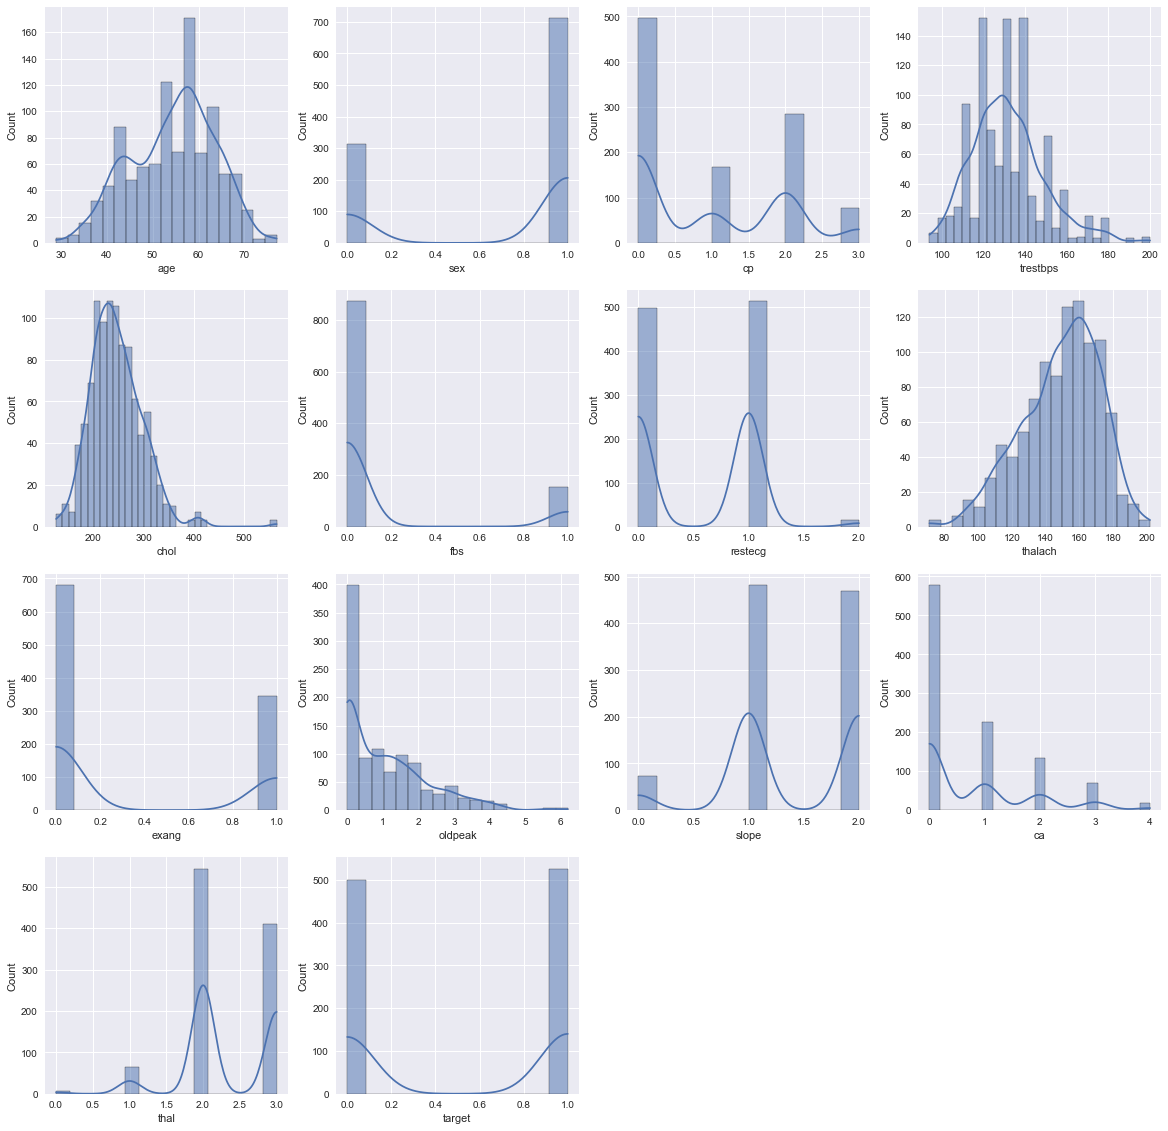

In [8]:
hist_count_plot(df, 4, 4, show_kde = True)

Какие первоначальные выводы по гистограммам можно сделать:


1. `age`. В основном принимавшие участие люди "зрелого" возраста - от 48 до 61 года. Распределение кажется мультимодальным: есть пик в возрасте около сорока, а также ближе к шестидесяти годам. Возможно, что в возрасте 40 лет люди начинают впервые ощущать симптомы - и правильно делают, что проходят обследования, потому что в это возрасте много пациентов с заболеваниями; и еще через 10-20 лет люди снова обращают внимание на симптомы, а больше всего людей с заболеваниями в возрасте около 55 лет.


2. `sex`. Среди опрошенных примерно в 2 раза больше мужчин, причем среди женщин больше больных женщин, а среди мужчин больше здоровых мужчин.


3. `cp`. Больше всего людей с "нулевым" типом грудной боли (из всех четырех типов). Меньше всего людей с третьми типом боли. Скорее всего, тип грудной боли связан с диагнозом, потому что большинство здоровых людей имеют нулевой тип боли. Для второго типа боли ситуация обратная (преобладают люди с заболеваниями).


4. `trestbps`. Артериальное давление в спокойном состоянии преимущественно находится в диапазоне 120 - 140 мм рт ст. Четкой взаимосвязи "признак - отклик" сходу не прослеживается, но можно отметить, что у больных пациентов давление скорее низкое или среднее.


5. `chol`, `thalach`. Уровень холестерина имеет распределение, напоминающее смещенное нормальное (смещение в сторону меньшего уровня холестерина). Для максимальной частоты сердечных сокращений ситуация "зеркальная": смещение в сторону большего значения. О частоте сердечных сокращений: у больных людей она выше, чем у здоровых.


6. `fbs`. Уровень сахара в крови натощак преимущественно менее 120 мг/дл. Для людей с уровнем сахара более 120 мг/дл вероятность заболевания примерно такая же.


7. `restecg`. Результаты электрокардиографии в состоянии покоя не вполне понятны: почти отсутствуют пациенты со значением признака, равным двум. Доли пациентов с показателями 0 и 1 примерно равны, но у людей с показателем "1" чаще наблюдается заболевание.


8. `exang`. Примерно у трети пациентов есть стенокардия, вызванная физической нагрузкой (значение признака "1"). Чаще пациенты без стенокардии имеют сердечные заболевания.


9. `oldpeak`. Уровень депрессии ST после активности преимущественно меньше 0.5. Сам показатель относится к открытию на электрокардиограмме, часто является признаком ишемии миокарда, основной причиной которой является коронарная недостаточность. У больных людей значение признака почти всегда не превышает 3.


10. `slope`. Пик наклона (пик наклона сегмента ST) преимущественно либо плоский, либо иметт наклон вверх (значения признака 0 и 1 соответственно). Больше всего больных людей с наклоном вверх сегмента ST.


11. `ca`. Индекс коронарного кальция встречается тем чаще, чем он меньше (и принимает значения от 0 до 4). Вероятность болезни сердца больше у людей со значением индекса 0 или 4 (чем у людей с индексами 1/2/3)


12. `thal`. Здесь приведены результаты теста на таллий - это тест на ядерную визуализацию, который показывает, насколько хорошо кровь поступает в сердце во время тренировки или в состоянии покоя. Этот тест также называется сердечным или ядерным стресс-тестом. У большинства людей тест показывает нормальный результат (и среди таких людей вероятность болезни больше), также есть пациенты с обратимым эффектом.


13. `target`. Классы пациентов сбалансированы.

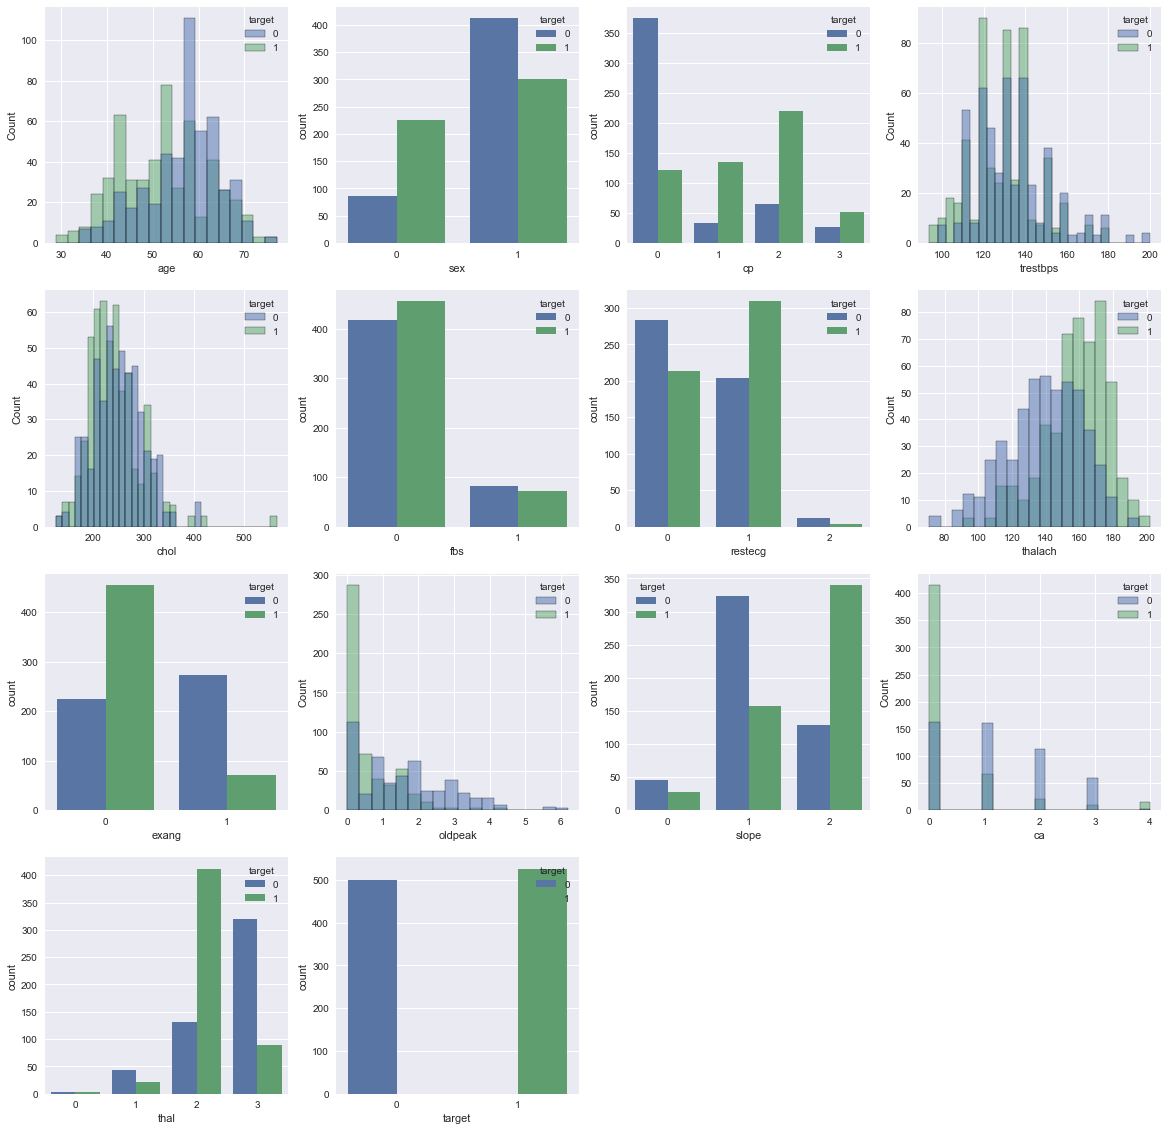

In [9]:
# Здесь для некоторых признаков строим count plot вместо гистограммы
hist_count_plot(df, 4, 4, show_class = True)

In [10]:
'''
    Функция box_plot для построения ящика с усами для каждого из признаков
    df: датасет pandas.DataFrame, набор данных
    nrows: число int, количество строк в сетке графиков
    ncols: число int, количество столбцов в сетке графиков
'''
def box_plot(df, nrows, ncols):
    fig = make_subplots(rows = nrows, cols=ncols)
    columns = df.iloc[:, :-1].columns
    r, c = 1, 1
    for col in columns:
        if c% (ncols) == 0:
            fig.add_trace(go.Box(x = df['target'],  y=df.loc[:, col],name= col), row = r, col=c)
            r+= 1
            c = 1
        else:
            fig.add_trace(go.Box(x = df['target'],  y=df.loc[:, col],name= col), row = r, col=c)
            c+=1

    fig.update_layout(height=800, width=1000, title_text="Boxplots")
    fig.show()

In [11]:
box_plot(df, 4, 4)

Кажется, что довольно влияние на диагноз оказывает возраст пациента. При этом не совсем понятно, почему заболеванию подвержены более "молодые" люди. Есть подозрение, что люди в возрасте уже проходили ранее лечение и стали более внимательно следить за здоровьем. 

Построение боксплотов для категориальных признаков не так легко интерпретируется, а для количественных признаков наблюдается небольшое количество выбросов. По этим выбросам можно понять, что, например, повышенное артериальное давление менее характерно для людей с сердечными заболеваниями. А уровень холестерина, наоборот, может принимать аномально высокое значение для больных людей.

Выведем также ящиковые диаграммы на одном графике для наглядности.

In [12]:
N = len(df.columns) -1     
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

fig = go.Figure(data=[go.Box(name= df.columns[i],
    y=df.iloc[:, i],
    marker_color=c[i]
    ) for i in range(int(N)) ])

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=True),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

Исследуем взаимосвязь признаков, построив матрицу корреляции.

In [13]:
# Матрица корреляции
df_corr = df.corr()

mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Построение
df_corr_viz = df_corr.mask(mask)
fig = px.imshow(df_corr_viz, text_auto=True)
fig.show()

Видна взаимосвязь целевой переменной с признаками `cp`, `thalach`, `slope`, `exng`, `oldpeak`. При этом эти признаки коррелирую между собой, что затрудняет выбор переменных. Для начала попробуем использовать все данные. 

Закодируем переменные `cp` и `slope`.

In [14]:
cp_dummies = pd.get_dummies(df['cp'], prefix = 'cp')
restecg_dummies = pd.get_dummies(df['restecg'], prefix = 'slope')

frames = [df, cp_dummies, restecg_dummies]
df = pd.concat(frames, axis = 1)
df.drop(['cp', 'slope'], axis = 1, inplace = True)
df = pd.concat([df.loc[:, 'age': 'thal'],  df.loc[:, 'cp_0': ], df['target']], axis = 1)

In [15]:
df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,cp_0,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,target
0,52,1,125,212,0,1,168,0,1.0,2,3,1,0,0,0,0,1,0,0
1,53,1,140,203,1,0,155,1,3.1,0,3,1,0,0,0,1,0,0,0
2,70,1,145,174,0,1,125,1,2.6,0,3,1,0,0,0,0,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,3,1,0,0,0,0,1,0,0
4,62,0,138,294,1,1,106,0,1.9,3,2,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,1,164,1,0.0,0,2,0,1,0,0,0,1,0,1
1021,60,1,125,258,0,0,141,1,2.8,1,3,1,0,0,0,1,0,0,0
1022,47,1,110,275,0,0,118,1,1.0,1,2,1,0,0,0,1,0,0,0
1023,50,0,110,254,0,0,159,0,0.0,0,2,1,0,0,0,1,0,0,1


In [16]:
X = df.iloc[:, :-1]
y = df['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43)

Выберем оптимальное пространство признаков.

In [18]:
# отберём с помощью RFE 15 признаков
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# выведем эти 15 признаков
print('Selected features: %s' % list(rfe.get_feature_names_out(df.iloc[:, :-1].columns)))

Selected features: ['sex', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'cp_0', 'cp_2', 'cp_3', 'slope_0', 'slope_1', 'slope_2']


Optimal number of features: 17
Selected features: ['age', 'sex', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'slope_0', 'slope_1', 'slope_2']


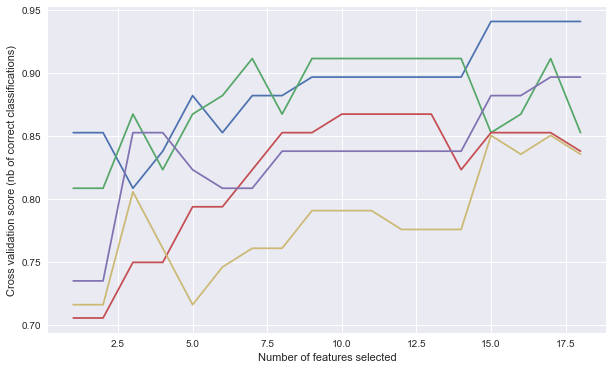

In [19]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='recall')
rfecv.fit(X_train, y_train)

selected_features_logregr = list(rfecv.get_feature_names_out(df.iloc[:, :-1].columns))

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features_logregr)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Воспользуемся результатами RFE, а также удалим признак slope_3 во избежание мультиколлинеарности.

In [20]:
df.drop(['cp_3', 'slope_2'], axis = 1, inplace = True)

### ШАГ 2. Реализация моделей классификации
<br>
На данном шаге рассмотрим разные модели классификации с оптимальным подбором параметров для каждой из них.

In [21]:
# Для оценки качества полученной классификации рассмотрим матрицу ошибок.
"""
    Функция conf_matrix для расчета TP (true positives), FP (false positives), TN (true negatives), FN (false negatives)  
    y_true: массив array, истинные отклики
    y_true: массив array, предсказанные классификатором отклики
"""

def conf_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels = ['Здоров', 'Болен'])
    disp.plot(cmap='Greens')
    plt.rcParams["axes.grid"] = False
    font = {'size' : 12}
    plt.rc('font', **font)
    plt.show()

### kNN

Для начала проведем только подбор (предварительный) параметра k с использованием кросс-валидации. Для осуществления стандартизации (требуется в данной модели) вместе с cv воспользуемся пайплайном.

In [22]:
"""
    Функция acc_rec для расчета метрик accuracy, recall для k-fold cross-validation  
    amount_folds: последовательность range, диапазон значений для количества фолдов
    amount_k: последовательность range, диапазон значений для значений k в модели knn
"""

def acc_rec(amount_folds, amount_k):
    result_acc, result_rec  = [], []
    for fold in amount_folds:
        score_acc = []
        score_rec = []
        skf = StratifiedKFold(n_splits=fold)
        for k in amount_k:
            clf = KNeighborsClassifier(n_neighbors = k, 
                algorithm = 'auto',   #  как искать ближайших соседей?
                leaf_size = 30,       #  параметр  BallTree или KDTree
                metric = 'minkowski', #  расстояние между объектами
                p = 2,                #  так расст. Минковского  превращается в евклидово
                weights = 'distance')  # одинаковые веса классов
            pipeline = make_pipeline(preprocessing.StandardScaler(), clf)
            score_acc.append(cross_val_score(pipeline, X, y, cv=skf, scoring= 'accuracy').mean())
            score_rec.append(cross_val_score(pipeline, X, y, cv=skf, scoring= 'recall_macro').mean())
            
        result_acc.append(score_acc)
        result_rec.append(score_rec)
    return result_acc, result_rec

In [23]:
amount_folds = range(5, 11, 5)
amount_k = range(1, 15)
result_acc,  result_rec = acc_rec(amount_folds, amount_k)[0], acc_rec(amount_folds, amount_k)[1]

In [24]:
fig= go.Figure() 
for ind, fold in enumerate(amount_folds):
    fig.add_scatter(x=np.array(amount_k), y=result_acc[ind], mode="lines", name =f"folds = {fold}")
fig.update_layout(width=950, title="Accuracy score with cv", 
                  xaxis_title="Amount of nearest neighbours in kNN", yaxis_title="Accuracy") 
fig.show()    

Нас особенно будет интересовать именно recall, потому что мы хотим обнаружить как можно большее количество людей с заболеваниями.

In [25]:
fig= go.Figure() 
for ind, fold in enumerate(amount_folds):
    fig.add_scatter(x=np.array(amount_k), y=result_rec[ind], mode="lines", name =f"folds = {fold}")
fig.update_layout(width=950, title="Recall score with cv", 
                  xaxis_title="Amount of nearest neighbours in kNN", yaxis_title="Recall") 
fig.show()    

In [26]:
# Будущий словарь с результатами
f1_macro_dict = {}

Оптимальным значением кажется k = 10, но мы все же это проверим с помощью поиска по сетке (т.к. все остальные параметры были неизменными). Возможно, предыдущий шаг был не так информативен, но мне показалось полезным визуализировать результаты для разных k.

In [27]:
# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43)

# clf = KNeighborsClassifier(algorithm='auto')

from sklearn.pipeline import make_pipeline, Pipeline
estimator_KNN = Pipeline([('scaler', preprocessing.StandardScaler()),
                               ('kNN', KNeighborsClassifier()) ])
parameters_KNN = {
    'kNN__n_neighbors': (1, 5, 10),
    'kNN__p': (1,2),
    'kNN__weights': ('uniform', 'distance'),
    'kNN__metric': ('minkowski', 'chebyshev')}


grid_CV = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'recall',
    cv = StratifiedKFold(n_splits=5)
)
grid_CV.fit(X_train, y_train)

#   Лучший набор значений гиперпараметров
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

cm_kNN = confusion_matrix(y_test, y_pred_test)
f1_macro_dict['kNN'] = f1_score(y_test, y_pred_test, average='macro')

Лучшие значения гиперпараметров:
 {'kNN__metric': 'minkowski', 'kNN__n_neighbors': 5, 'kNN__p': 1, 'kNN__weights': 'distance'}


Оказалось, что есть более оптимальный набор гиперпараметров модели, его и будем использовать.

На тестовой выборке:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       152
           1       0.98      0.98      0.98       187

    accuracy                           0.98       339
   macro avg       0.98      0.98      0.98       339
weighted avg       0.98      0.98      0.98       339



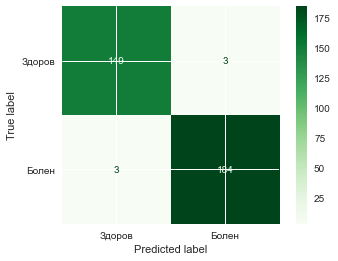

In [28]:
print('На тестовой выборке:')
print(classification_report(y_test, y_pred_test))
conf_matrix(y_test, y_pred_test)

Отличные результаты. Возможно, даже слишком оптимистичные :)

Вручную реализуем алгоритм. Для простоты реализации не будем его перегружать параметрами.

In [29]:
"""
    Функция kNN_manual для построения классификатора kNN "вручную"
    amount_k: число int, количество соседей в модели knn
    metric: строка str, метрика для расчета расстояний между объектами
"""

def kNN_manual(amount_k, metric):
    distance_dict = dict()
    y_pred_test = []
    for test_obj in np.array(X_test):
        for train_obj, train_label in zip(np.array(X_train), np.array(y_train)):
            if metric == 'euclidean':
                distance_obj = distance.euclidean(test_obj, train_obj)
            elif metric == 'manhattan':
                distance_obj = distance.cityblock(test_obj, train_obj)
            distance_dict.update({distance_obj: train_label})
        sorted_distance_dict_k = dict(sorted(distance_dict.items())[:amount_k + 1])
        most_common_label = mode(sorted_distance_dict_k.values())
        y_pred_test.append(most_common_label)
    return np.array(y_pred_test)

In [30]:
y_pred_test_manual = kNN_manual(amount_k = 3, metric = 'euclidean')
f1_macro_dict['kNN_manual'] = f1_score(y_test, y_pred_test_manual, average='macro')

На тестовой выборке:
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       152
           1       0.96      0.73      0.83       187

    accuracy                           0.83       339
   macro avg       0.85      0.85      0.83       339
weighted avg       0.86      0.83      0.83       339



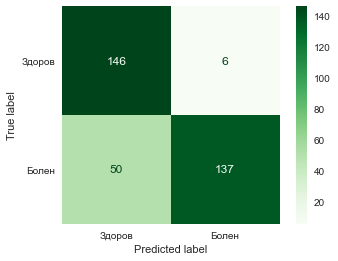

In [31]:
print('На тестовой выборке:')
print(classification_report(y_test, y_pred_test_manual))
conf_matrix(y_test, y_pred_test_manual)

Зная результаты реализации в sklearn, становится грустно) Думаю, ситуацию сможет улучшить учет весов при расчете расстояний.

### Classification tree

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43)

# Строим первоначальную модель для дальнейшего подбора гиперпараметров
model_grid = DecisionTreeClassifier(random_state=21,
                               criterion='entropy',
                               max_depth=5,
                               max_leaf_nodes=None,
                               min_samples_split=20,
                               min_samples_leaf=10,
                               class_weight={0: 1, 1: 1}
                               )

#   Определяем интересующие значения гиперпараметров
# Везде я использую в качестве меры неопределенности/загрязненности энтропию
params_set = {
'max_depth': [4, 5, 6],
'min_samples_leaf': [1, 5, 10],
'min_samples_split': [2, 6, 8],
'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 1}, {0: 1, 1: 3}]
}

scoring = {'F1_macro': 'f1_macro', 'Recall': 'recall', 'AUC': 'roc_auc'}

#   Проводим 5-fold кросс-валидацию со стратификацией из-за несбалансированности классов
#   Качество моделей сравниваем с помощью f меры
grid_CV = GridSearchCV(estimator=model_grid,
       param_grid=params_set,
       scoring=scoring,
       refit='F1_macro',
       cv= StratifiedKFold(n_splits=5))

#   Обучение на обучающей выборке
grid_CV.fit(X_train, y_train)

#   Лучший набор значений гиперпараметров
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

cm_tree = confusion_matrix(y_test, y_pred_test)
f1_macro_dict['tree'] = f1_score(y_test, y_pred_test, average='macro')

Лучшие значения гиперпараметров:
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


На тестовой выборке:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       152
           1       0.90      0.95      0.92       187

    accuracy                           0.91       339
   macro avg       0.92      0.91      0.91       339
weighted avg       0.92      0.91      0.91       339



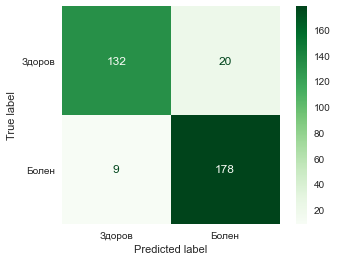

In [33]:
print('На тестовой выборке:')
print(classification_report(y_test, y_pred_test))
conf_matrix(y_test, y_pred_test)

Судя по результатам классификации, дерево не выглядит переобученным. Хотелось бы уменьшить количество FN (false negatives).

### Logistic regression

In [34]:
# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43)


# Стандартизуем!
estimator_logreg = Pipeline([('scaler', preprocessing.StandardScaler()),
                               ('logReg',LogisticRegression(max_iter = 1000, solver='liblinear')) ])
parameters_logreg = {
    'logReg__penalty': ('l2','l1', None),
    'logReg__tol': (0.01, 0.001),
    'logReg__class_weight': ({0:1, 1:1}, {0:1, 1:2}),
    'logReg__C': (0.5, 1.0)}


grid_CV = GridSearchCV(
    estimator=estimator_logreg,
    param_grid=parameters_logreg,
    scoring = 'recall',
    cv = StratifiedKFold(n_splits=5)
)
grid_CV.fit(X_train, y_train)

#   Лучший набор значений гиперпараметров
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

cm_logreg = confusion_matrix(y_test, y_pred_test)
f1_macro_dict['logreg'] = f1_score(y_test, y_pred_test, average='macro')

Лучшие значения гиперпараметров:
 {'logReg__C': 0.5, 'logReg__class_weight': {0: 1, 1: 2}, 'logReg__penalty': 'l2', 'logReg__tol': 0.01}


На тестовой выборке:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       152
           1       0.81      0.93      0.87       187

    accuracy                           0.84       339
   macro avg       0.85      0.83      0.84       339
weighted avg       0.85      0.84      0.84       339



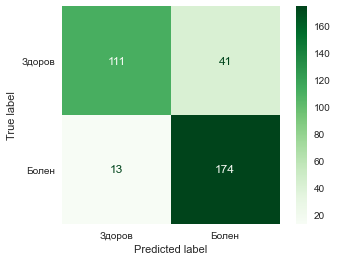

In [35]:
print('На тестовой выборке:')
print(classification_report(y_test, y_pred_test))
conf_matrix(y_test, y_pred_test)

Модель почти треть здоровых пациентов посчитала больными. Это не очень хорошо, потому что даже в случае выявления ошибки человек может изрядно понервничать (это как минимум).

### Naive Bayes

In [36]:
# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43)

proba_1 = len(df[df['target'] == 1]) / len(df)
proba_0 = len(df[df['target'] == 0]) / len(df)

priors = [None, [proba_1, proba_0]]
var_smoothing = np.logspace(0, -9, num=100)

# Стандартизуем!
estimator_nb = Pipeline([('scaler', preprocessing.StandardScaler()),
                               ('NB', GaussianNB()) ])
parameters_nb = {
    'NB__priors': priors,
    'NB__var_smoothing': var_smoothing}


grid_CV = GridSearchCV(
    estimator=estimator_nb,
    param_grid=parameters_nb,
    scoring = 'recall',
    cv = StratifiedKFold(n_splits=5)
)
grid_CV.fit(X_train, y_train)

#   Лучший набор значений гиперпараметров
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_test)
f1_macro_dict['naive_bayes'] = f1_score(y_test, y_pred_test, average='macro')

Лучшие значения гиперпараметров:
 {'NB__priors': None, 'NB__var_smoothing': 0.12328467394420659}


На тестовой выборке:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       152
           1       0.83      0.91      0.87       187

    accuracy                           0.84       339
   macro avg       0.85      0.84      0.84       339
weighted avg       0.85      0.84      0.84       339



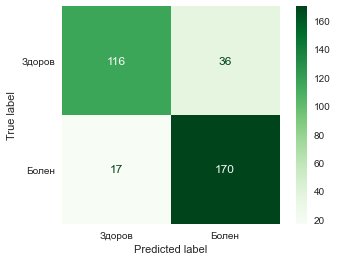

In [37]:
print('На тестовой выборке:')
print(classification_report(y_test, y_pred_test))
conf_matrix(y_test, y_pred_test)

Довольно неплохие результаты, учитывая наивность классификатора.

### SVM

In [38]:
# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43)


# Стандартизуем!
estimator_svc = Pipeline([('scaler', preprocessing.StandardScaler()),
                               ('SVC', SVC()) ])

parameters_svc = {
    'SVC__C': (0.1, 0.25, 0.5, 0.75, 1, 2),
    'SVC__kernel': ("linear", "rbf"),
    'SVC__gamma': ("scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1)}


grid_CV = GridSearchCV(
    estimator=estimator_svc,
    param_grid=parameters_svc,
    scoring = 'recall',
    cv = StratifiedKFold(n_splits=5)
)
grid_CV.fit(X_train, y_train)

#   Лучший набор значений гиперпараметров
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_test)
f1_macro_dict['svm'] = f1_score(y_test, y_pred_test, average='macro')

Лучшие значения гиперпараметров:
 {'SVC__C': 0.75, 'SVC__gamma': 1, 'SVC__kernel': 'rbf'}


На тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96       152
           1       0.94      1.00      0.97       187

    accuracy                           0.96       339
   macro avg       0.97      0.96      0.96       339
weighted avg       0.96      0.96      0.96       339



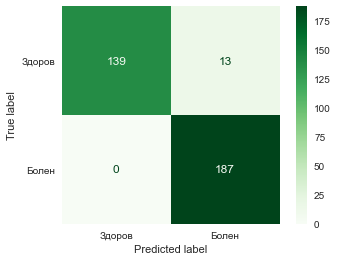

In [39]:
print('На тестовой выборке:')
print(classification_report(y_test, y_pred_test))
conf_matrix(y_test, y_pred_test)

Алгоритм хорошо справился: отсутствуют ложно-отрицательные срабатывания (когда мы утверждаем, что пациент здоров, а на самом деле он болен), а также мало ложно-положительных срабатываний классификатора.

### ШАГ 2. Реализация моделей классификации
<br>
На данном шаге рассмотрим разные модели классификации с оптимальным подбором параметров для каждой из них.

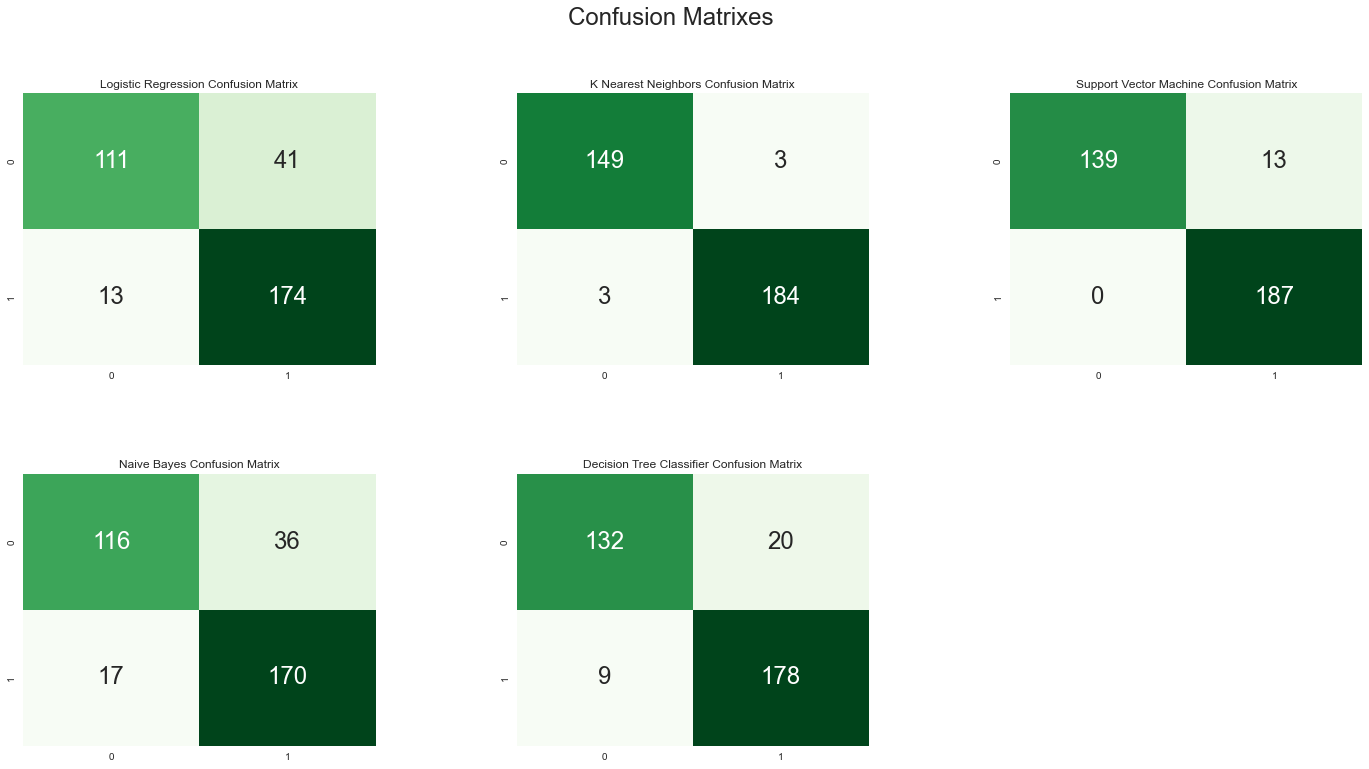

In [40]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_logreg,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_kNN,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_tree,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [41]:
f1_macro_dict = dict(sorted(f1_macro_dict.items(), key = lambda x: x[1], reverse = True))

df_results = pd.DataFrame({'method' : f1_macro_dict.keys() , 'f1_macro' : f1_macro_dict.values() })
df_results

,method,f1_macro
0,kNN,0.982110
1,svm,0.960867
2,tree,0.912850
3,naive_bayes,0.839588
4,logreg,0.835010
5,kNN_manual,0.834692


### Вывод по задаче 1

В данной задаче мы старались снизить число ложно-отрицательных срабатываний, понимая ответственность за здоровье пациентов. С точки зрения "компромисса" между точностью и полнотой лучше всего себя показал алгоритм k-го ближайшего соседа, однако модель опорных векторов обладает максимальной полнотой, что соответствует естественной постановке задачи.

### Задача 2

Теперь перейдем к разбору другого набора данных для классификации.

Данные взяты с сайте kaggle

 <b> Glass Classification </b>
 
https://www.kaggle.com/datasets/uciml/glass

In [42]:
# Считаем данные и выведем датафрейм
df = pd.read_csv('glass.csv')

df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


### ШАГ 0. Знакомство с данными и их осмысление. Постановка задачи.
<br>
В данных нет пропусков.

Имеем данные о 214-ти образцах стекла. Полный перечень атрибутов будет приведен ниже.
<br>

<b>Задача </b>: на основании характеристик стекла предсказывать его тип.

In [43]:
# Размер датафрейма
df.shape

(214, 10)

In [44]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

<b>Описание переменных</b>

RI: показатель преломления

Na: Натрий (единицы измерения: массовый процент в соответствующем оксиде)

Мг: Магний

Al: Алюминий

Si: Кремний

К: Калий

Ca: Кальций

Ba: Барий

Fe: Железо

Type: (атрибут класса)

    -- 1 окна жилых зданий (обработаны)
    -- 2 окна жилых зданий (не обработаны)
    -- 3 окна транспорта (обработаны)
    -- 5 контейнеры
    -- 6 столовые приборы
    -- 7 фары

In [45]:
print('Пропуски в каждом столбце:')
df.isnull().sum()

Пропуски в каждом столбце:


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Предварительно можно отметить, что содержание разных элементов в стекле довольно сильно отличается (разные масштабы у признаков). Также различается разброс у признаков.

In [46]:
# Краткая информация по признакам
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### ШАГ 1. Предобработка данных. Разведочный анализ.
<br>
На данном шаге исследуем взаимосвязь предикторов, распределения признаков.

In [47]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

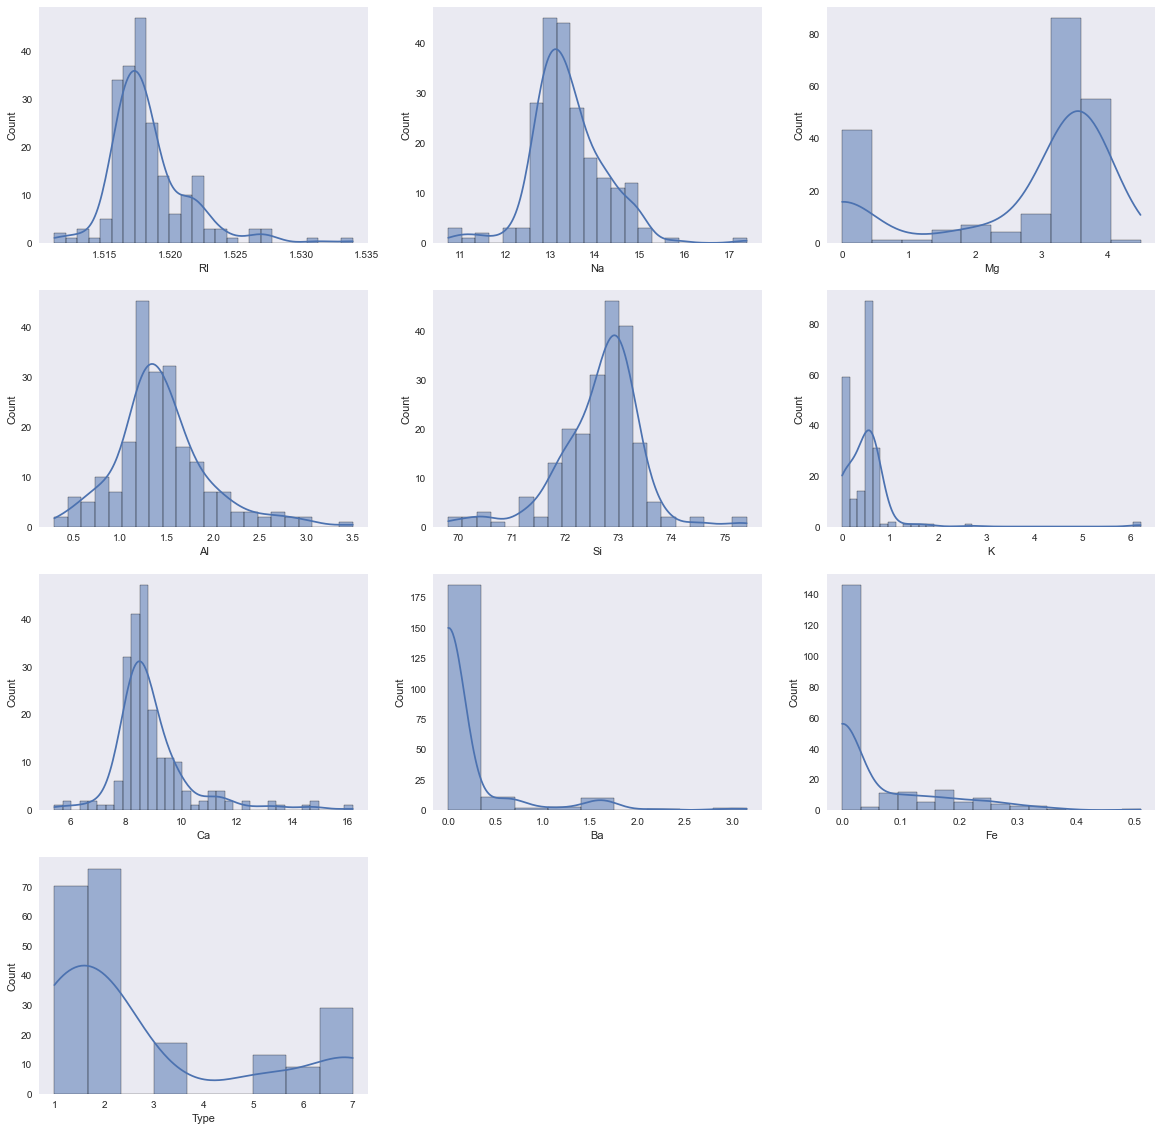

In [48]:
hist_count_plot(df, 4, 3, show_kde = True, show_class = False)

Выводы при анализе распределений признаков и отклика:

1. Распределения признаков `RI`, `Na`, `Ca` схожи: довольно много значений вблизи среднего, выражены правые "хвосты" распределений.

2. Чаще всего представлены образцы стекол типов 1 и 2.

3. Сходи распределения и у признаков `Ba`, `Fe`, напоминает логнормальное.

Если построить боксплот для каждого из признаков, то можно снова увидеть, что масштаб предикторов сильно отличается (и их тяжело сравнивать на одном графике). У значений признака `Ba`, например, большинство выбросов относится к стеклу класса 7. Далее подробнее изучим каждый класс.

In [49]:
import plotly.graph_objects as go
import numpy as np

N = len(df.columns) -1     
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

fig = go.Figure(data=[go.Box(name= df.columns[i],
    y=df.iloc[:, i],
    marker_color=c[i]
    ) for i in range(int(N)) ])

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=True),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

Посмотрим на диапазоны значений признаков для каждого типа стекла.

In [50]:
'''
    Функция box_plot для построения ящика с усами для каждого из признаков
    df: датасет pandas.DataFrame, набор данных
    nrows: число int, количество строк в сетке графиков
    ncols: число int, количество столбцов в сетке графиков
'''
def box_plot(df, nrows, ncols):
    fig = make_subplots(rows = nrows, cols=ncols)
    columns = df.iloc[:, :-1].columns
    r, c = 1, 1
    for col in columns:
        if c% (ncols) == 0:
            fig.add_trace(go.Box(x = df['Type'],  y=df.loc[:, col],name= col), row = r, col=c)
            r+= 1
            c = 1
        else:
            fig.add_trace(go.Box(x = df['Type'],  y=df.loc[:, col],name= col), row = r, col=c)
            c+=1

    fig.update_layout(height=1000, width=1000, title_text="Boxplots")
    fig.show()

`RI`. Высокие показатели у классов 5-6.

`Na`. Высокие показатели у классов 6-7.

`Mg`. Высокие показатели у классов 1-3.

`Na`. Снова высокие показатели у классов 6-7.


В целом видно, что:

- представители классов 1-3 часто имеют схожие медианные значения (однако класс 2 выбивается со своим большим межквартильным размахом)
- у каждого типа стекла значения признаков имеют выбросы, затрудняющие анализ, особенно класс 2

In [51]:
box_plot(df, 3, 4)

In [52]:
z = np.abs(stats.zscore(df))

# Попробуем удалить из рассмотрения только те образцы, у которых по всем признакам наблюдаются аномальные значения
df_clean = df[(z<3).all(axis=1)]

In [53]:
print(f'Уменьшили количество образцов с {len(df)} до {len(df_clean)}, удалено {round(100*(1- len(df_clean) /len(df)),2)} % наблюдений')

Уменьшили количество образцов с 214 до 194, удалено 9.35 % наблюдений


In [54]:
df = df_clean

Построим матрицу корреляции. После удаления очвединых выбросов можно видеть сильную взаимосвязь отклика с параметрами `Mg`, `Al`, `Ba`. Причем эти признаки скоррелированы и между собой.

In [55]:
# Матрица корреляции
df_corr = df_clean.corr()

mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Построение
df_corr_viz = df_corr.mask(mask)
fig = px.imshow(df_corr_viz, text_auto=True)
fig.show()

In [56]:
X = df.iloc[:, :-1]
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43)

Selected features: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Optimal number of features: 7
Selected features: ['Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe']


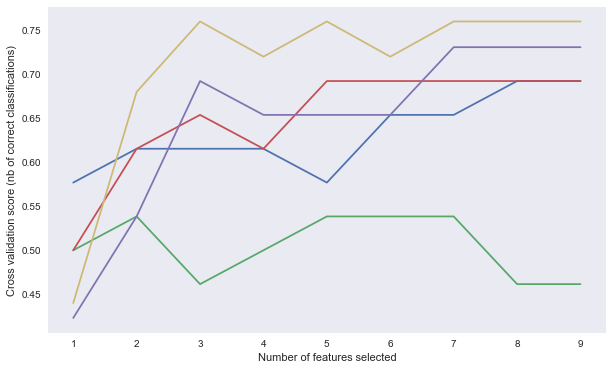

In [57]:
# отберём с помощью RFE 15 признаков
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# выведем эти 15 признаков
print('Selected features: %s' % list(rfe.get_feature_names_out(df.iloc[:, :-1].columns)))




rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

selected_features_logregr = list(rfecv.get_feature_names_out(df.iloc[:, :-1].columns))

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features_logregr)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [58]:
df.drop(['RI', 'Ba'], axis = 1, inplace = True)

In [59]:
X = df.iloc[:, :-1]
y = df['Type']

### ШАГ 2. Реализация моделей классификации
<br>
На данном шаге рассмотрим разные модели классификации с оптимальным подбором параметров для каждой из них. В отличие от прошлой задачи, ориентироваться будем уже на количество правильных ответов. Здесь выбор метрики не диктуется рисками со здоровьем (хотя если бы это была реальная задача, то это необходимо было бы уточнить).

Немного изменим функцию построения cm для работы с несколькими классами.

In [60]:
# Для оценки качества полученной классификации рассмотрим матрицу ошибок.
"""
    Функция conf_matrix для расчета TP (true positives), FP (false positives), TN (true negatives), FN (false negatives)  
    y_true: массив array, истинные отклики
    y_true: массив array, предсказанные классификатором отклики
"""

def conf_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels = [1, 2, 3, 5, 6, 7])
    disp.plot(cmap='Greens')
    plt.rcParams["axes.grid"] = False
    font = {'size' : 12}
    plt.rc('font', **font)
    plt.show()

In [61]:
f1_macro_dict = {}

### kNN

In [62]:
# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43, stratify = y)

from sklearn.pipeline import make_pipeline, Pipeline
estimator_KNN = Pipeline([('scaler', preprocessing.StandardScaler()),
                               ('kNN', KNeighborsClassifier()) ])
parameters_KNN = {
    'kNN__n_neighbors': (1, 2, 3, 5, 10),
    'kNN__p': (1,2),
    'kNN__weights': ('uniform', 'distance'),
    'kNN__metric': ('minkowski', 'chebyshev')}


grid_CV = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    cv = StratifiedKFold(n_splits=5)
)
grid_CV.fit(X_train, y_train)

#   Лучший набор значений гиперпараметров
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

cm_kNN = confusion_matrix(y_test, y_pred_test)
f1_macro_dict['kNN'] = f1_score(y_test, y_pred_test, average='macro')

Лучшие значения гиперпараметров:
 {'kNN__metric': 'minkowski', 'kNN__n_neighbors': 3, 'kNN__p': 1, 'kNN__weights': 'uniform'}


На тестовой выборке:
              precision    recall  f1-score   support

           1       0.59      0.83      0.69        23
           2       0.76      0.70      0.73        23
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.88      0.93         8

    accuracy                           0.72        65
   macro avg       0.73      0.68      0.69        65
weighted avg       0.70      0.72      0.70        65



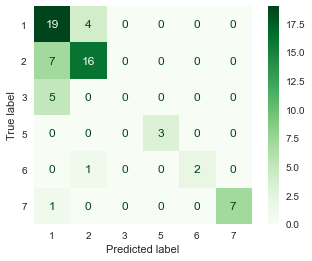

In [63]:
print('На тестовой выборке:')
print(classification_report(y_test, y_pred_test))
conf_matrix(y_test, y_pred_test)

Классификатор справился неплохо: в целом мы умеем определять классы 1-2, 5-7, путаемся при определении класса 3 (классификатор не обнаружил ни одного представителя данного класса).

Как же обойтись без проверки "ручного алгоритма" :)

In [64]:
y_pred_test_manual = kNN_manual(amount_k = 3, metric = 'euclidean')
f1_macro_dict['kNN_manual'] = f1_score(y_test, y_pred_test_manual, average='macro')

На тестовой выборке:
              precision    recall  f1-score   support

           1       0.46      0.70      0.55        23
           2       0.57      0.57      0.57        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         8

    accuracy                           0.45        65
   macro avg       0.17      0.21      0.19        65
weighted avg       0.36      0.45      0.40        65



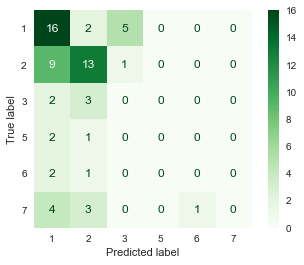

In [65]:
print('На тестовой выборке:')
print(classification_report(y_test, y_pred_test_manual))
conf_matrix(y_test, y_pred_test_manual)

От таких результатов при определении классов 3,5-7 становится совсем грустно, так что пойдем дальше. Алгоритм требует доработки.

### Classification tree

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43, stratify = y)

# Строим первоначальную модель для дальнейшего подбора гиперпараметров
model_grid = DecisionTreeClassifier(random_state=21,
                               criterion='entropy',
                               max_depth=5,
                               max_leaf_nodes=None,
                               min_samples_split=20,
                               min_samples_leaf=10,
                               class_weight={1: 1, 2: 1, 3:1, 5:1, 6:1, 7:1}
                               )

#   Определяем интересующие значения гиперпараметров
# Везде я использую в качестве меры неопределенности/загрязненности энтропию
params_set = {
'max_depth': [4, 5, 6],
'min_samples_leaf': [1, 5, 10],
'min_samples_split': [2, 6, 8],
'class_weight': [{1: 1, 2: 1, 3:1, 5:1, 6:1, 7:1}, {1: 1, 2: 2, 3:2, 5:1, 6:1, 7:1}]
}

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc'}

#   Проводим 5-fold кросс-валидацию со стратификацией из-за несбалансированности классов
#   Качество моделей сравниваем с помощью f меры
grid_CV = GridSearchCV(estimator=model_grid,
       param_grid=params_set,
       scoring=scoring,
       refit='Accuracy',
       cv= StratifiedKFold(n_splits=5))

#   Обучение на обучающей выборке
grid_CV.fit(X_train, y_train)

#   Лучший набор значений гиперпараметров
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

cm_tree = confusion_matrix(y_test, y_pred_test)
f1_macro_dict['tree'] = f1_score(y_test, y_pred_test, average='macro')

Лучшие значения гиперпараметров:
 {'class_weight': {1: 1, 2: 1, 3: 1, 5: 1, 6: 1, 7: 1}, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


На тестовой выборке:
              precision    recall  f1-score   support

           1       0.62      0.65      0.64        23
           2       0.61      0.74      0.67        23
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.88      0.93         8

    accuracy                           0.69        65
   macro avg       0.71      0.71      0.71        65
weighted avg       0.65      0.69      0.67        65



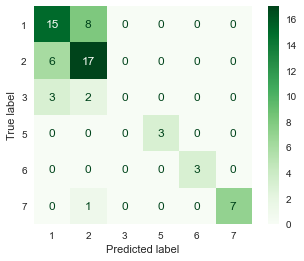

In [67]:
print('На тестовой выборке:')
print(classification_report(y_test, y_pred_test))
conf_matrix(y_test, y_pred_test)

Дерево тоже не может выявить образцы третьего класса, почти безошибочно определяет стекло для контейнеров, столовых приборов и фар (классы 5-7).

### Logistic Regression

In [68]:
# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43, stratify = y)


# Стандартизуем!
estimator_logreg = Pipeline([('scaler', preprocessing.StandardScaler()),
                               ('logReg',LogisticRegression(max_iter = 1000, solver='liblinear')) ])
parameters_logreg = {
    'logReg__penalty': ('l2','l1', None),
    'logReg__tol': (0.01, 0.001),
    'logReg__class_weight': ({1: 1, 2: 1, 3:1, 5:1, 6:1, 7:1}, {1: 1, 2: 2, 3:2, 5:1, 6:1, 7:1}),
    'logReg__C': (0.5, 1.0)}


grid_CV = GridSearchCV(
    estimator=estimator_logreg,
    param_grid=parameters_logreg,
    scoring = 'accuracy',
    cv = StratifiedKFold(n_splits=5)
)
grid_CV.fit(X_train, y_train)

#   Лучший набор значений гиперпараметров
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

cm_logreg = confusion_matrix(y_test, y_pred_test)
f1_macro_dict['logreg'] = f1_score(y_test, y_pred_test, average='macro')

Лучшие значения гиперпараметров:
 {'logReg__C': 1.0, 'logReg__class_weight': {1: 1, 2: 1, 3: 1, 5: 1, 6: 1, 7: 1}, 'logReg__penalty': 'l1', 'logReg__tol': 0.01}


На тестовой выборке:
              precision    recall  f1-score   support

           1       0.70      0.83      0.76        23
           2       0.74      0.74      0.74        23
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         8

    accuracy                           0.75        65
   macro avg       0.71      0.71      0.70        65
weighted avg       0.70      0.75      0.72        65



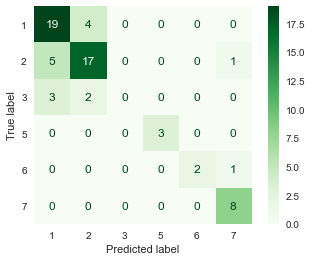

In [69]:
print('На тестовой выборке:')
print(classification_report(y_test, y_pred_test))
conf_matrix(y_test, y_pred_test)

Видимо, класс №3 - неуловимый и мимикрирующий под классы 1 и 2 :) Если бы была поставлена реальная задача, я бы уточнила, действительно ли важно определение именно класса 3: если допускается использование данного типа стекла для разных сфер эксплуатации, то можно было бы объединить классы 2 и 3 (или 1 и 3, это тоже требует определения).

В этом случае мы бы знали о том, что классы "смешаны", но смогли бы точнее определять эту миксованную группу (а затем, применять более сложные методы, чтобы разделить 2 близких класса).

### Naive Bayes

In [70]:
# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43, stratify = y)

proba_1 = len(df[df['Type'] == 1]) / len(df)
proba_2 = len(df[df['Type'] == 2]) / len(df)
proba_3 = len(df[df['Type'] == 3]) / len(df)
proba_5 = len(df[df['Type'] == 5]) / len(df)
proba_6 = len(df[df['Type'] == 6]) / len(df)
proba_7 = len(df[df['Type'] == 7]) / len(df)

priors = [None, [proba_7, proba_6, proba_5, proba_3, proba_2, proba_1]]
var_smoothing = np.logspace(0, -9, num=100)

# Стандартизуем!
estimator_nb = Pipeline([('scaler', preprocessing.StandardScaler()),
                               ('NB', GaussianNB()) ])
parameters_nb = {
    'NB__priors': priors,
    'NB__var_smoothing': var_smoothing}


grid_CV = GridSearchCV(
    estimator=estimator_nb,
    param_grid=parameters_nb,
    scoring = 'accuracy',
    cv = StratifiedKFold(n_splits=5)
)
grid_CV.fit(X_train, y_train)

#   Лучший набор значений гиперпараметров
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_test)
f1_macro_dict['naive_bayes'] = f1_score(y_test, y_pred_test, average='macro')

Лучшие значения гиперпараметров:
 {'NB__priors': None, 'NB__var_smoothing': 0.533669923120631}


На тестовой выборке:
              precision    recall  f1-score   support

           1       0.58      0.91      0.71        23
           2       0.81      0.57      0.67        23
           3       0.00      0.00      0.00         5
           5       1.00      0.67      0.80         3
           6       0.67      0.67      0.67         3
           7       0.86      0.75      0.80         8

    accuracy                           0.68        65
   macro avg       0.65      0.59      0.61        65
weighted avg       0.68      0.68      0.65        65



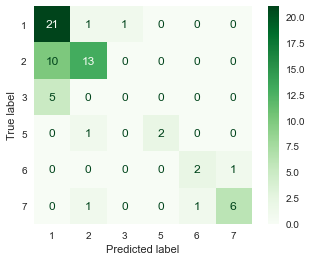

In [71]:
print('На тестовой выборке:')
print(classification_report(y_test, y_pred_test))
conf_matrix(y_test, y_pred_test)

Классификатор довольно неплохо определяет классы 2, 5-7.

### SVM

In [72]:
# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43, stratify = y)


# Стандартизуем!
estimator_svc = Pipeline([('scaler', preprocessing.StandardScaler()),
                               ('SVC', SVC()) ])

parameters_svc = {
    'SVC__C': (0.1, 0.25, 0.5, 0.75, 1, 2),
    'SVC__kernel': ("linear", "rbf"),
    'SVC__gamma': ("scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1)}


grid_CV = GridSearchCV(
    estimator=estimator_svc,
    param_grid=parameters_svc,
    scoring = 'accuracy',
    cv = StratifiedKFold(n_splits=5)
)
grid_CV.fit(X_train, y_train)

#   Лучший набор значений гиперпараметров
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_test)
f1_macro_dict['svm'] = f1_score(y_test, y_pred_test, average='macro')

Лучшие значения гиперпараметров:
 {'SVC__C': 2, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}


На тестовой выборке:
              precision    recall  f1-score   support

           1       0.76      0.83      0.79        23
           2       0.67      0.87      0.75        23
           3       0.00      0.00      0.00         5
           5       1.00      0.67      0.80         3
           6       0.50      0.33      0.40         3
           7       1.00      0.75      0.86         8

    accuracy                           0.74        65
   macro avg       0.65      0.57      0.60        65
weighted avg       0.70      0.74      0.71        65



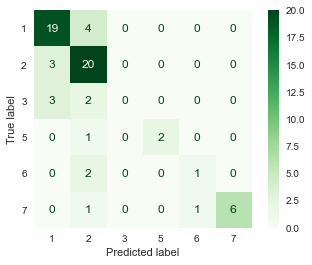

In [73]:
print('На тестовой выборке:')
print(classification_report(y_test, y_pred_test))
conf_matrix(y_test, y_pred_test)

Алгоритм лучше других справился с выявлением классов 1,2, чем другие. Образцы классов 5-7 также хорошо определены.

In [74]:
f1_macro_dict = dict(sorted(f1_macro_dict.items(), key = lambda x: x[1], reverse = True))

df_results = pd.DataFrame({'method' : f1_macro_dict.keys() , 'f1_macro' : f1_macro_dict.values() })
df_results

,method,f1_macro
0,tree,0.706383
1,logreg,0.698003
2,kNN,0.691919
3,naive_bayes,0.607533
4,svm,0.600588
5,kNN_manual,0.186157


### Вывод по задаче 2

Довольно затруднительно выбрать в метрику в данной задаче, не имея контекста. Возможно, что в зависимости от типа стекла оно используется в тех или иных целях. Поэтому нам бы не хотелось делать посуду из материала, который предназначен для остекленения домов, и наоборот :) Этими рассуждениями объясняется выбор метрики f1 как метрики для сравнения методов. С этой точки зрения дерево принятия решений показало себя лучше всех.

Дерево почти безошибочно определило образцы классов 5-7. А для определения классов 1-2 лучше всего подойдет метод опорных векторов. Замечания об определении класса 3 см. ранее.

### Выводы

В работе были выполены все поставленные задачи: изучены набор данных и проведен разведочный анализ, выбраны метрики оценки качества и реализованы модели классификации (включая имеющиеся модели в sklearn и ручную реализацию алгоритма knn), подобраны параметры моделей.

Обоснование применяемых преобразований приведено в ходе работы.